In [7]:
import re
import requests                
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# url address to request web page
URL = "https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States"
try:
    # Request the page and get its contents
    r = requests.get(URL).text
except Exception as e:
    # for logging errors ie Network connection Errors
    print(e)

    
# In case we are not on network lets use a local cached file of the website
r = open('List_of_presidents_of_the_United_States.html', 'r').read()

# Instantiate BeaustifulSoup object for page scraping
soup = BeautifulSoup(r, 'lxml')

# Lets get the table of interest
table = soup.find('table', {'class': 'wikitable'})


def tableDataText(table):    
    """Parses a html segment started with tag <table> followed 
    by multiple <tr> (table rows) and inner <td> (table data) tags. 
    It returns a list of rows with inner columns. 
    Accepts only one <th> (table header/data) in the first row.
    """
    def rowgetDataText(tr, coltag='td'): # td (data) or th (header)
        return [td.get_text(strip=True) for td in tr.find_all(coltag)]  
    rows = []
    trs = table.find_all('tr')
    headerow = rowgetDataText(trs[0], 'th')
    if headerow: # if there is a header row include first
        rows.append(headerow)
        trs = trs[1:]
    for tr in trs: # for every table row
        rows.append(rowgetDataText(tr, 'td') ) # data row       
    return rows

headers = ['Number', 'Presidency', 'Image', 'Presidents', 'Prior Office',
           '', 'Party', 'Election', 'Vice President']

list_table = tableDataText(table)
dataframe = pd.DataFrame(list_table[2:], columns=headers)

def first_names_tot_presidents():
    '''Helper function to get first names and total presidents'''
    names = []
    for name in dataframe['Presidents']:
        if name:
            names.append(name.split()[0])
    return names, len(names)

In [8]:
# Show the dataframe
# dataframe.set_index('Presidency', inplace=True)
dataframe

,Number,Presidency,Image,Presidents,Prior Office,,Party,Election,Vice President
0,1,"April 30, 1789[d]–March 4, 1797",,George Washington1732–1799(Lived 67 years)[3][...,Commander-in-Chiefof theContinental Army(1775–...,,Unaffiliated[2],1788–89,John Adams[e][f]
1,1792,None,None,None,None,None,None,None,None
2,2,"March 4, 1797–March 4, 1801",,John Adams1735–1826(Lived 90 years)[6][7][8],1stvice president of the United States(1789–1797),,Federalist,1796,Thomas Jefferson[g]
3,3,"March 4, 1801–March 4, 1809",,Thomas Jefferson1743–1826(Lived 83 years)[9][1...,2ndvice president of the United States(1797–1801),,Democratic-Republican,1800,"Aaron BurrMarch 4, 1801–March 4, 1805"
4,1804,"George ClintonMarch 4, 1805–March 4, 1809",None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
75,43,"January 20, 2001–January 20, 2009",,George W. BushBorn 1946(73 years old)[126][127...,46thgovernor of Texas(1995–2000),,Republican,2000,Dick Cheney
76,2004,None,None,None,None,None,None,None,None
77,44,"January 20, 2009–January 20, 2017",,Barack ObamaBorn 1961(58 years old)[129][130][...,U.S. senator(Class 3)fromIllinois(2005–2008),,Democratic,2008,Joe Biden
78,2012,None,None,None,None,None,None,None,None


In [49]:
# How many presidents on the page
number = first_names_tot_presidents()[1]
print(f"How many presidents on the page : {number}")

How many presidents on the page : 45


In [50]:
# Which presidents were assasinated
assassination_pattern = re.compile(r'''Assassinated''')
assassinated = []
for index in range(len(dataframe['Presidency'])):
    if dataframe['Presidency'][index]:
        if assassination_pattern.search(dataframe['Presidency'][index]):
            assassinated.append(dataframe['Presidents'][index])
print(assassinated)


['Abraham Lincoln1809–1865(Lived 56 years)[48][49][50]', 'James A. Garfield1831–1881(Lived 49 years)[60][61][62]', 'William McKinley1843–1901(Lived 58 years)[72][73][74]', 'John F. Kennedy1917–1963(Lived 46 years)[102][103][104]']


In [51]:
# Presidents selected after serving as senators
senators = []
senator_pattern = re.compile(r'U.S. senator')
for index in range(len(dataframe['Prior Office'])):
    if dataframe['Prior Office'][index]:
        if senator_pattern.search(dataframe['Prior Office'][index]):
            senators.append(dataframe['Presidents'][index])
print(senators)


['Andrew Jackson1767–1845(Lived 78 years)[21][22][23]', 'Benjamin Harrison1833–1901(Lived 67 years)[69][70][71]', 'Warren G. Harding1865–1923(Lived 57 years)[84][85][86]', 'John F. Kennedy1917–1963(Lived 46 years)[102][103][104]', 'Barack ObamaBorn 1961(58 years old)[129][130][131]']


In [14]:
# Presidents selected after serving as vice presidents
vices = []
vp_pattern = re.compile(r'vice president')
for index in range(len(dataframe['Prior Office'])):
    if dataframe['Prior Office'][index]:
        if vp_pattern.search(dataframe['Prior Office'][index]):
            vices.append(dataframe['Presidents'][index])
print(vices)


['John Adams1735–1826(Lived 90 years)[6][7][8]', 'Thomas Jefferson1743–1826(Lived 83 years)[9][10][11]', 'Martin Van Buren1782–1862(Lived 79 years)[24][25][26]', 'John Tyler1790–1862(Lived 71 years)[30][31][32]', 'Millard Fillmore1800–1874(Lived 74 years)[39][40][41]', 'Andrew Johnson1808–1875(Lived 66 years)[51][52][53]', 'Chester A. Arthur1829–1886(Lived 57 years)[63][64][65]', 'Theodore Roosevelt1858–1919(Lived 60 years)[75][76][77]', 'Calvin Coolidge1872–1933(Lived 60 years)[87][88][89]', 'Harry S. Truman1884–1972(Lived 88 years)[96][97][98]', 'Lyndon B. Johnson1908–1973(Lived 64 years)[105][106][107]', 'Richard Nixon1913–1994(Lived 81 years)[108][109][110]', 'Gerald Ford1913–2006(Lived 93 years)[111][112][113]', 'George H. W. Bush1924–2018(Lived 94 years)[120][121][122]']


In [9]:
# which presidents had one VP for duration of term

In [79]:
# which president was in office for long time and when he left

In [53]:
# How many presidents with same forenames? 
forenames = {name:0 for name in first_names_tot_presidents()[0]}
for key, value in forenames.items():
    for name in filter(None, dataframe['Presidents']):
        if key == name.split()[0]:
            forenames[key] += 1
        continue

# Uncomment below to print the names
# print(forenames)
total = 0
for key in forenames:
    if forenames[key] > 1:
        total += 1

# Total number of presidents with similar forenames
print(f'Total Number of presidents with similar forename is : {total}')
        



Total Number of presidents with similar forename is : 7


In [81]:
# oldest president ever elected
# birthdates = []
# dates_pattern = re.compile(r'\d\d\d\d')
# for date in filter(None, dataframe['Presidents']):
#     if dates_pattern.search(date):
#         birthdates.append(dates_pattern.search(date).group(0))
# # print(birthdates)

# electdates = []
# for date in filter(None, dataframe['Presidency']):
#     if dates_pattern.search(date):
#         electdates.append(dates_pattern.search(date).group(0))
# print(electdates)




In [13]:
# # youngest president elected
# birthdates = []
# dates_pattern = re.compile(r'\d\d\d\d')
# for date in filter(None, dataframe['Presidents']):
#     if dates_pattern.search(date):
#         birthdates.append(dates_pattern.search(date).group(0))
# # print(birthdates)

In [54]:
# president who lived to an old age after leaving office
# question not clear so i think presidents who left office but are still alive
birthdays = []
birth_pattern = re.compile(r'Born\s\d\d\d\d')
for birth in filter(None, dataframe['Presidents']):
    if birth_pattern.search(birth):
        birthdays.append(birth)

data = {}
age_pattern = re.compile(r'''(\d\d years old)''')
for num, name in enumerate(birthdays):
    if age_pattern.search(name):
        data.update({name: age_pattern.search(name).group(0).split()[0]})
        
# now print the president with the highest age and still living
print(f'''The president who lived to an old age after leaving office is: {max(data)}''')


The president who lived to an old age after leaving office is: Jimmy CarterBorn 1924(95 years old)[114][115][116]


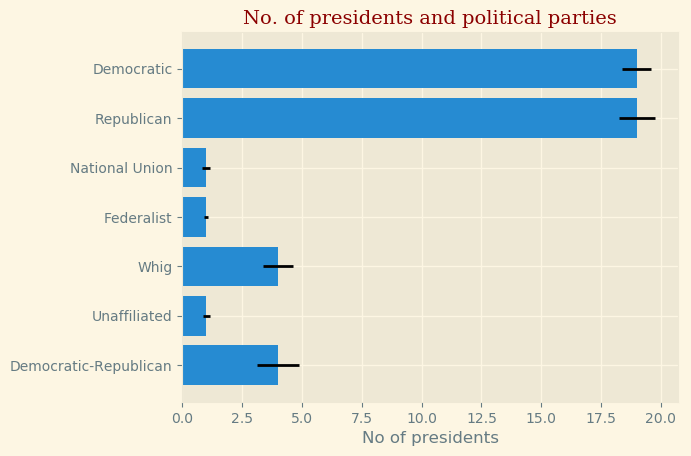

In [61]:

# Graph that shows no. of presidents and their respective political parties and party with many presidents
parties = {"Democratic":0 , "Republican":0, "National Union":0,
           "Federalist":0, "Whig":0, "Unaffiliated":0,
           "Democratic-Republican":0}

for key,value in parties.items():
    for party in filter(None, dataframe['Party']):
        if re.match(key, party):
#         if party.startswith(key):
            parties[key] += 1
        continue
        
# print(parties)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


plt.rcdefaults()
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(parties))
    presidents = 3 + 10 * np.random.rand(len(parties))
    error = np.random.rand(len(parties))
    ax.barh(*zip(*parties.items()), xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(parties)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('No of presidents')
    ax.set_title('No. of presidents and political parties', fontdict=font) 
plt.show()
    
                
                
    

Unaffiliated (2) Federalist (1) Democratic-Republican (4) National Republican (1) Democratic (15) Whig (4) Republican (19) National Union (2)  \
                                                                                                                                   Presidency[a]   
0                                                   1                                                                                              
1                                                   1                                                                                              
2                                                   2                                                                                              
3                                                   3                                                                                              
4                                                   3                                                                                              
..                                                ...                                                                                              
76                                                 43                                                                                              
77                                                 43                                                                                              
78                                                 44                                                                                              
79                                                 44                                                                                              
80                                                 45                                                                                              

                                                 \
                      Presidency[a].1 President   
0     April 30, 1789[d]–March 4, 1797       NaN   
1     April 30, 1789[d]–March 4, 1797       NaN   
2         March 4, 1797–March 4, 1801       NaN   
3         March 4, 1801–March 4, 1809       NaN   
4         March 4, 1801–March 4, 1809       NaN   
..                                ...       ...   
76  January 20, 2001–January 20, 2009       NaN   
77  January 20, 2001–January 20, 2009       NaN   
78  January 20, 2009–January 20, 2017       NaN   
79  January 20, 2009–January 20, 2017       NaN   
80         January 20, 2017–Incumbent       NaN   

                                                       \
                                          President.1   
0   George Washington1732–1799(Lived 67 years)[3][...   
1   George Washington1732–1799(Lived 67 years)[3][...   
2        John Adams1735–1826(Lived 90 years)[6][7][8]   
3   Thomas Jefferson1743–1826(Lived 83 years)[9][1...   
4   Thomas Jefferson1743–1826(Lived 83 years)[9][1...   
..                                                ...   
76  George W. BushBorn 1946(73 years old)[126][127...   
77  George W. BushBorn 1946(73 years old)[126][127...   
78  Barack ObamaBorn 1961(58 years old)[129][130][...   
79  Barack ObamaBorn 1961(58 years old)[129][130][...   
80      Donald TrumpBorn 1946(73 years old)[132][133]   

                                                                \
                                      Prior office[b] Party[c]   
0   Commander-in-Chiefof theContinental Army(1775–...      NaN   
1   Commander-in-Chiefof theContinental Army(1775–...      NaN   
2   1stvice president of the United States(1789–1797)      NaN   
3   2ndvice president of the United States(1797–1801)      NaN   
4   2ndvice president of the United States(1797–1801)      NaN   
..                                                ...      ...   
76                   46thgovernor of Texas(1995–2000)      NaN   
77                   46thgovernor of Texas(1995–2000)      NaN   
78          